In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os

In [2]:
pd.read_excel("/kaggle/input/dataset/Banking Case - Data.xlsx")

Unnamed: 0         Unnamed: 1  \
0          NaN           Variable   
1          NaN    Customer_number   
2          NaN  Acc_creation_date   
3          NaN          Insurance   
4          NaN            balance   
5          NaN            housing   
6          NaN               loan   
7          NaN            contact   
8          NaN           duration   
9          NaN           campaign   
10         NaN   last_contact_day   
11         NaN           previous   
12         NaN           poutcome   
13         NaN       Term Deposit   
14         NaN          Count_Txn   
15         NaN                NaN   
16         NaN                NaN   
17         NaN    Customer_number   
18         NaN                age   
19         NaN                job   
20         NaN            marital   
21         NaN          education   
22         NaN      Annual Income   
23         NaN             Gender   

                                           Unnamed: 2            Unnamed: 3  
0                                         Description             Data Type  
1               Unique Customer Identification number                    ID  
2                                Account opening date                  Date  
3                   Has the customer taken insurance?           Categorical  
4                                                 NaN               Numeric  
5                Has the customer taken housing loan?           Categorical  
6              Has the customer taken personal loan?            Categorical  
7                          Contact communication type           Categorical  
8   Duration of call with the customer for Term loan                Numeric  
9   Number of contacts performed during this campa...               Numeric  
10  Number of days that passed by after the client...               Numeric  
11  Number of contacts performed before this campa...           Categorical  
12         Outcome of the previous marketing campaign           Categorical  
13  Has the customer subscribed a term deposit (fi...  Target (categorical)  
14        Number of Transactions Done by the customer               Numeric  
15                                                NaN                   NaN  
16                                                NaN                   NaN  
17              Unique Customer Identification number                    ID  
18                           Age of customer in years               Numeric  
19                       Type of job the customer has           Categorical  
20                     Marital status of the customer           Categorical  
21                Highest education level of customer           Categorical  
22                      Annual income of the customer               Numeric  
23                             Gender of the customer           Categorical

In [3]:
import pandas as pd

# Replace 'your_file.xlsx' with the actual name of your Excel file
excel_file = pd.ExcelFile('/kaggle/input/dataset/Banking Case - Data.xlsx')

# Get the names of all sheets in the Excel file
sheet_names = excel_file.sheet_names

# Create a dictionary to store DataFrames
dataframes = {sheet_name: excel_file.parse(sheet_name) for sheet_name in sheet_names}

for sheet_name, df in dataframes.items():
    print(f"\nContents of sheet '{sheet_name}'")


Contents of sheet 'Data Dictionary'

Contents of sheet 'Transaction Data'

Contents of sheet 'Customer Demographics'


In [4]:
df_transaction = dataframes['Transaction Data']
df_demo = dataframes['Customer Demographics']

In [5]:
df_transaction.head()

Sno  Customer_number Insurance balance housing loan  contact  duration  \
0    0             1001        no    2143     yes   no      NaN     261.0   
1    1             1002        no      29     yes   no  unknown     151.0   
2    2             1003        no       2     yes  yes  unknown      76.0   
3    3             1004        no    1506     yes   no  unknown      92.0   
4    4             1005        no       1      no   no  unknown     198.0   

   campaign  last_contact_day  previous poutcome Term Deposit  Count_Txn  
0         1                 2         0  unknown           no      351.0  
1         1                 2         0  unknown           no      326.0  
2         1                 2         0      NaN           no      422.0  
3         1                 2         0  unknown           no      113.0  
4         1                 2         0  unknown           no      342.0

In [6]:
df = pd.merge(df_transaction,df_demo,on = "Customer_number")

In [7]:
df

Sno  Customer_number Insurance balance housing loan    contact  \
0          0             1001        no    2143     yes   no        NaN   
1          1             1002        no      29     yes   no    unknown   
2          2             1003        no       2     yes  yes    unknown   
3          3             1004        no    1506     yes   no    unknown   
4          4             1005        no       1      no   no    unknown   
...      ...              ...       ...     ...     ...  ...        ...   
45206  45206            46207        no     825      no   no   cellular   
45207  45207            46208        no    1729      no   no   cellular   
45208  45208            46209        no    5715      no   no   cellular   
45209  45209            46210        no     668      no   no  telephone   
45210  45210            46211        no    2971      no   no   cellular   

       duration  campaign  last_contact_day  previous poutcome Term Deposit  \
0         261.0         1                 2         0  unknown           no   
1         151.0         1                 2         0  unknown           no   
2          76.0         1                 2         0      NaN           no   
3          92.0         1                 2         0  unknown           no   
4         198.0         1                 2         0  unknown           no   
...         ...       ...               ...       ...      ...          ...   
45206       0.0         0                -1         0  unknown          yes   
45207       0.0         0                -1         0  unknown          yes   
45208    1127.0         5               184         3  success          yes   
45209       0.0         0                -1         0  unknown           no   
45210     361.0         2               188        11    other           no   

       Count_Txn  age           job   marital  education Annual Income Gender  
0          351.0   58    management   married   tertiary        839368      M  
1          326.0   44    technician    single  secondary       1452858      M  
2          422.0   33  entrepreneur   married        NaN       4851383      F  
3          113.0   47   blue collar   married    unknown       3207754      F  
4          342.0   33       unknown    single    unknown       2562322      M  
...          ...  ...           ...       ...        ...           ...    ...  
45206      152.0   51    technician   married   tertiary       2229818      M  
45207      334.0  121       retired  divorced    primary       2783556      M  
45208      381.0   72       retired   married  secondary        443512      M  
45209      211.0   57   blue-collar   married  secondary       4193684      F  
45210      331.0   37  entrepreneur   married  secondary       3617935      M  

[45211 rows x 20 columns]

In [8]:
df.describe()

Sno  Customer_number      duration      campaign  \
count  45211.000000     45211.000000  45172.000000  45211.000000   
mean   22605.000000     23606.000000    258.139511      2.762182   
std    13051.435847     13051.435847    257.631452      3.087291   
min        0.000000      1001.000000   -167.000000      0.000000   
25%    11302.500000     12303.500000    103.000000      1.000000   
50%    22605.000000     23606.000000    180.000000      2.000000   
75%    33907.500000     34908.500000    319.000000      3.000000   
max    45210.000000     46211.000000   4918.000000     63.000000   

       last_contact_day      previous     Count_Txn           age  
count      45211.000000  45211.000000  45210.000000  45211.000000  
mean          41.832253      0.580323    299.614952     40.980005  
std           99.457030      2.303441    115.721788     10.838273  
min           -9.000000      0.000000   -423.000000     18.000000  
25%            1.000000      0.000000    200.000000     33.000000  
50%            1.000000      0.000000    300.000000     39.000000  
75%            1.000000      0.000000    400.000000     48.000000  
max          871.000000    275.000000    499.000000    121.000000

In [9]:
df = df.drop(columns = ["Sno","Customer_number"],axis=1)

In [10]:
from pandas_profiling import ProfileReport
import pandas as pd

# Create a ProfileReport
profile = ProfileReport(df, minimal=True, explorative=True)

# Generate widgets and save the report
profile.to_widgets()

# Saving file to in JSON and HTML format
# To HTML
profile.to_file("your_report.html")

/opt/conda/lib/python3.10/site-packages/numba/core/decorators.py:262: NumbaDeprecationWarning: numba.generated_jit is deprecated. Please see the documentation at: https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-generated-jit for more information and advice on a suitable replacement.
  warnings.warn(msg, NumbaDeprecationWarning)
/opt/conda/lib/python3.10/site-packages/visions/backends/shared/nan_handling.py:51: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  def hasna(x: np.ndarray) -> bool:
/tmp/ipykernel_19/1187903996.py:1: DeprecationWarning: `import pandas_profiling` is going to be deprecated by April 1st. Please use `import ydata_profiling

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render widgets:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Insurance         45211 non-null  object 
 1   balance           45156 non-null  object 
 2   housing           45211 non-null  object 
 3   loan              45203 non-null  object 
 4   contact           45168 non-null  object 
 5   duration          45172 non-null  float64
 6   campaign          45211 non-null  int64  
 7   last_contact_day  45211 non-null  int64  
 8   previous          45211 non-null  int64  
 9   poutcome          45196 non-null  object 
 10  Term Deposit      45203 non-null  object 
 11  Count_Txn         45210 non-null  float64
 12  age               45211 non-null  int64  
 13  job               45198 non-null  object 
 14  marital           45193 non-null  object 
 15  education         45190 non-null  object 
 16  Annual Income     45194 non-null  object

We can see that there is null values in Term Deposit which is our target values. So, lets remove the null rows

In [12]:
df = df.dropna(subset=['Term Deposit'])

In [13]:
non_numeric_rows = df[~df['balance'].astype(str).str.contains(r'^[0-9.]+$')]
non_numeric_rows

Insurance balance housing loan   contact  duration  campaign  \
41           no     NaN     yes   no   unknown     180.0         2   
123          no     NaN     yes  yes   unknown     127.0         2   
176          no     NaN     yes   no   unknown     179.0         2   
356          no     NaN     yes   no   unknown     404.0         4   
606          no     NaN      no   no   unknown      92.0         2   
...         ...     ...     ...  ...       ...       ...       ...   
44469        no     -32      no  yes  cellular     366.0         2   
44541        no     -62      no   no   unknown      17.0         1   
44566        no     -52      no   no   unknown      12.0         1   
44578        no    -280      no   no   unknown       6.0         1   
44626        no    -205      no   no  cellular     481.0         1   

       last_contact_day  previous poutcome Term Deposit  Count_Txn  age  \
41                    1         0  pending           no      381.0   50   
123                   1         0  unknown           no      264.0   43   
176                   1         0  unknown           no      334.0   48   
356                   1         0  unknown           no      447.0   44   
606                   1         0  unknown           no      326.0   49   
...                 ...       ...      ...          ...        ...  ...   
44469               178         9  success          yes      366.0   35   
44541                 1         0  unknown           no      147.0   28   
44566                 1         0  unknown           no      382.0   34   
44578                 1         0  unknown           no      100.0   36   
44626               579         1  failure          yes      353.0   31   

                job  marital  education Annual Income Gender  
41       management  married  secondary       4587759      M  
123        services  married  secondary        806383      F  
176      unemployed  married  secondary       1123572      M  
356     blue-collar   single  secondary       2416769      M  
606      technician  married    unknown       1282987      F  
...             ...      ...        ...           ...    ...  
44469        admin.   single  secondary        212193      F  
44541    management   single   tertiary        211055      M  
44566      services  married  secondary        210478      M  
44578  entrepreneur  married  secondary        210026      M  
44626      services   single  secondary        208226      F  

[86 rows x 18 columns]

## Univariate analyis

### Categorical analysis

#### 1. Insurance

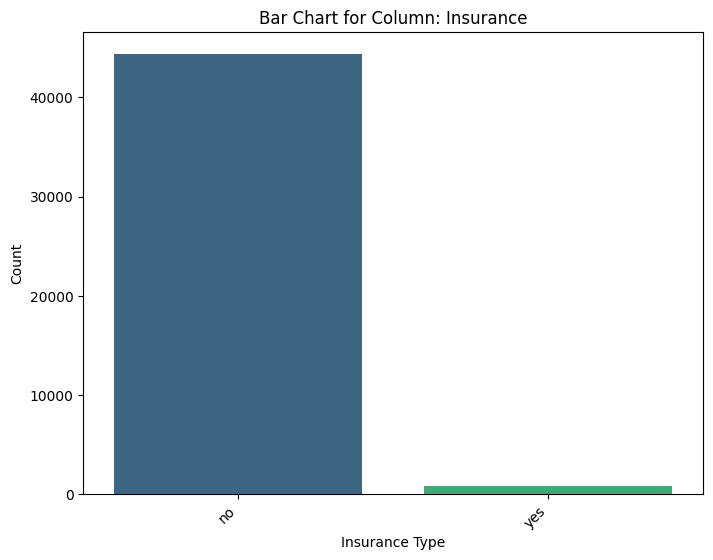

In [14]:
data = df['Insurance'].value_counts()

# Plot a bar chart
plt.figure(figsize=(8, 6))
sns.barplot(x=data.index, y=data, palette='viridis')
plt.title('Bar Chart for Column: Insurance')
plt.xlabel('Insurance Type')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better visibility
plt.show()

#### 2. Housing

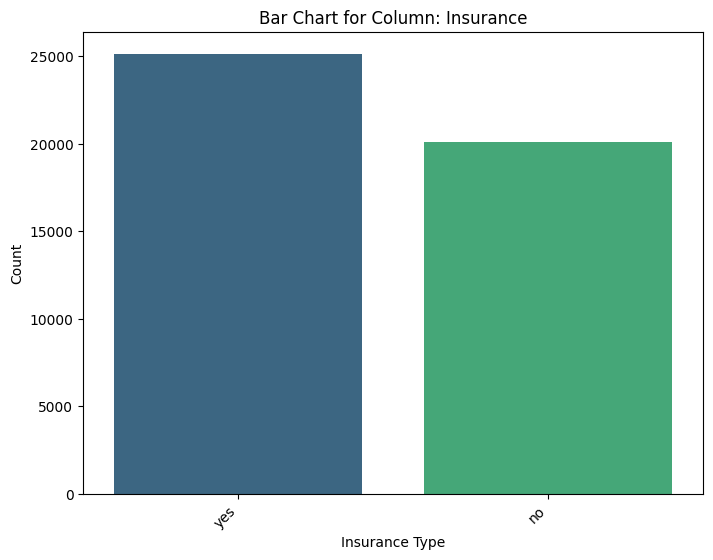

In [15]:
data = df['housing'].value_counts()

# Plot a bar chart
plt.figure(figsize=(8, 6))
sns.barplot(x=data.index, y=data, palette='viridis')
plt.title('Bar Chart for Column: Insurance')
plt.xlabel('Insurance Type')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better visibility
plt.show()

#### 3.Loan

In [16]:
df["loan"].isnull().sum()

8

In [17]:
df["loan"].value_counts()

loan
no     37951
yes     7244
Name: count, dtype: int64

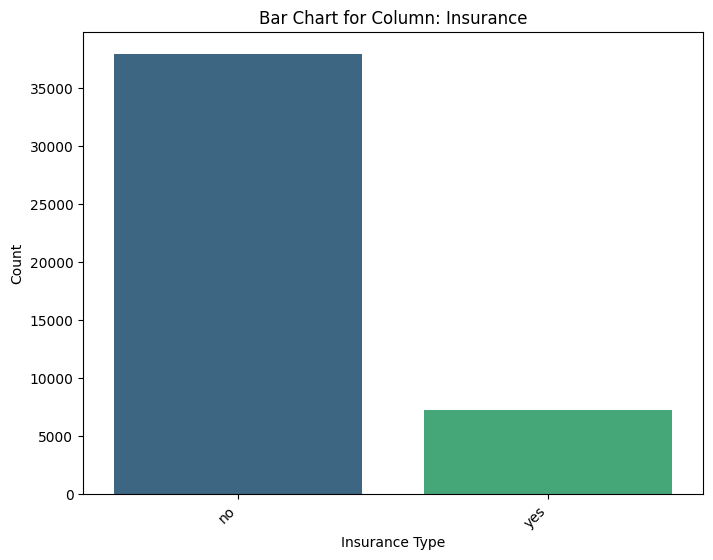

In [18]:
data = df['loan'].value_counts()

# Plot a bar chart
plt.figure(figsize=(8, 6))
sns.barplot(x=data.index, y=data, palette='viridis')
plt.title('Bar Chart for Column: Insurance')
plt.xlabel('Insurance Type')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better visibility
plt.show()

#### 4.Contact

In [19]:
df["contact"].value_counts()

contact
cellular     29282
unknown      12963
telephone     2850
Mobile          29
Tel             20
?               17
Name: count, dtype: int64

In [20]:
df['contact'] = df['contact'].replace({'Mobile': 'cellular', 'Tel': 'telephone','?':'unknown'})

/tmp/ipykernel_19/3760031172.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['contact'] = df['contact'].replace({'Mobile': 'cellular', 'Tel': 'telephone','?':'unknown'})


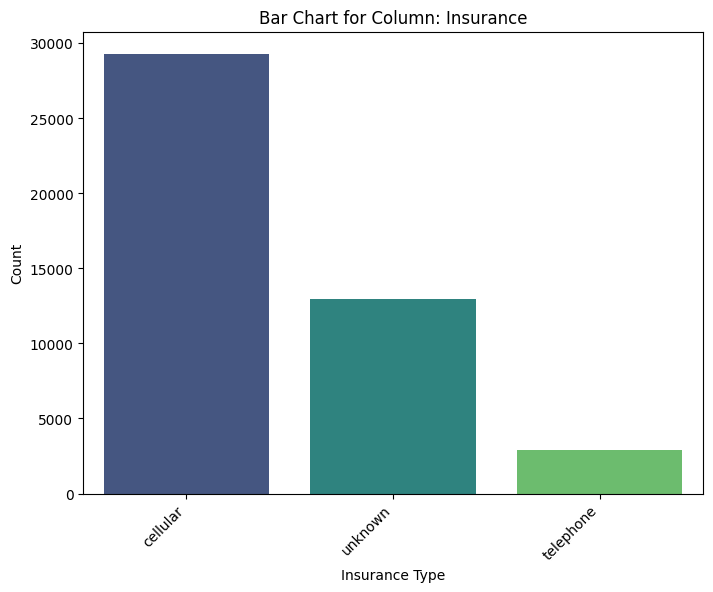

In [21]:
data = df['contact'].value_counts()

# Plot a bar chart
plt.figure(figsize=(8, 6))
sns.barplot(x=data.index, y=data, palette='viridis')
plt.title('Bar Chart for Column: Insurance')
plt.xlabel('Insurance Type')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better visibility
plt.show()

There are null values. Lets set them to unknown

In [22]:
df['contact'] = df['contact'].fillna("unknown")

/tmp/ipykernel_19/2047820888.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['contact'] = df['contact'].fillna("unknown")


#### 5. Poutcome

In [23]:
df["poutcome"].value_counts()

poutcome
unknown    36876
failure     4901
other       1840
success     1511
pending       55
?              4
????           1
Name: count, dtype: int64

In [24]:
df['poutcome'] = df['poutcome'].replace({'?': 'unknown', '????': 'unknown', 'pending': 'unknown'})

/tmp/ipykernel_19/2228822526.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['poutcome'] = df['poutcome'].replace({'?': 'unknown', '????': 'unknown', 'pending': 'unknown'})


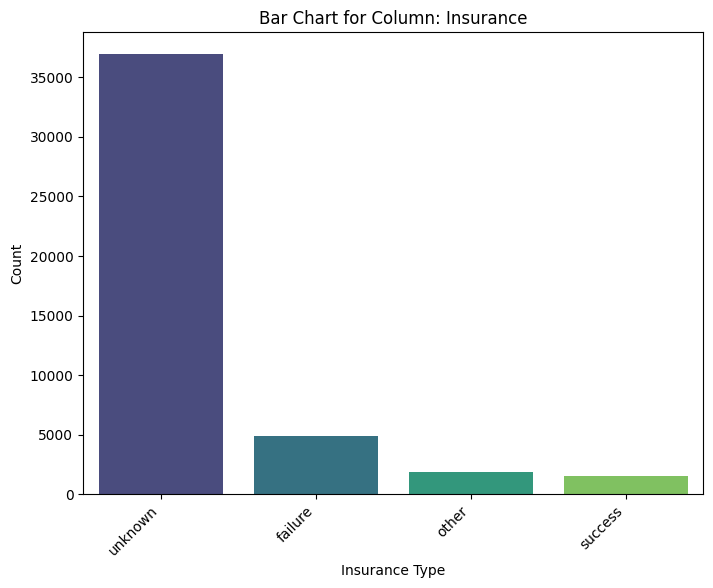

In [25]:
data = df['poutcome'].value_counts()

# Plot a bar chart
plt.figure(figsize=(8, 6))
sns.barplot(x=data.index, y=data, palette='viridis')
plt.title('Bar Chart for Column: Insurance')
plt.xlabel('Insurance Type')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better visibility
plt.show()

#### 6. Term Deposit - Target

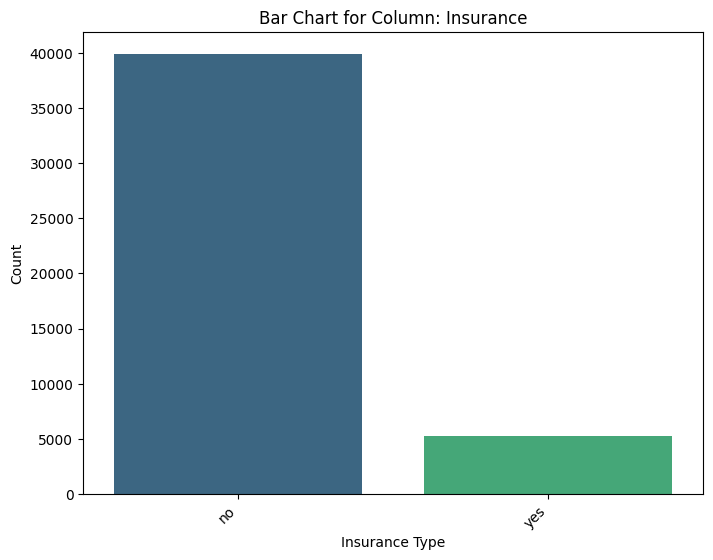

In [26]:
data = df['Term Deposit'].value_counts()

# Plot a bar chart
plt.figure(figsize=(8, 6))
sns.barplot(x=data.index, y=data, palette='viridis')
plt.title('Bar Chart for Column: Insurance')
plt.xlabel('Insurance Type')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better visibility
plt.show()

#### 7.Job

In [27]:
df["job"].value_counts

<bound method IndexOpsMixin.value_counts of 0          management
1          technician
2        entrepreneur
3         blue collar
4             unknown
             ...     
45206      technician
45207         retired
45208         retired
45209     blue-collar
45210    entrepreneur
Name: job, Length: 45203, dtype: object>

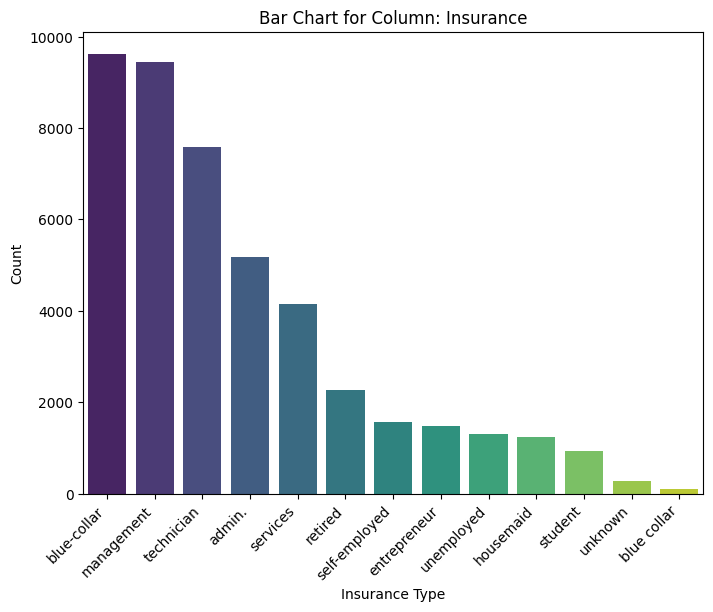

In [28]:
data = df['job'].value_counts()

# Plot a bar chart
plt.figure(figsize=(8, 6))
sns.barplot(x=data.index, y=data, palette='viridis')
plt.title('Bar Chart for Column: Insurance')
plt.xlabel('Insurance Type')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better visibility
plt.show()

In [29]:
df['job'] = df['job'].replace({'blue-collar': 'blue collar'})

/tmp/ipykernel_19/2941275177.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['job'] = df['job'].replace({'blue-collar': 'blue collar'})


#### 8. Marital status

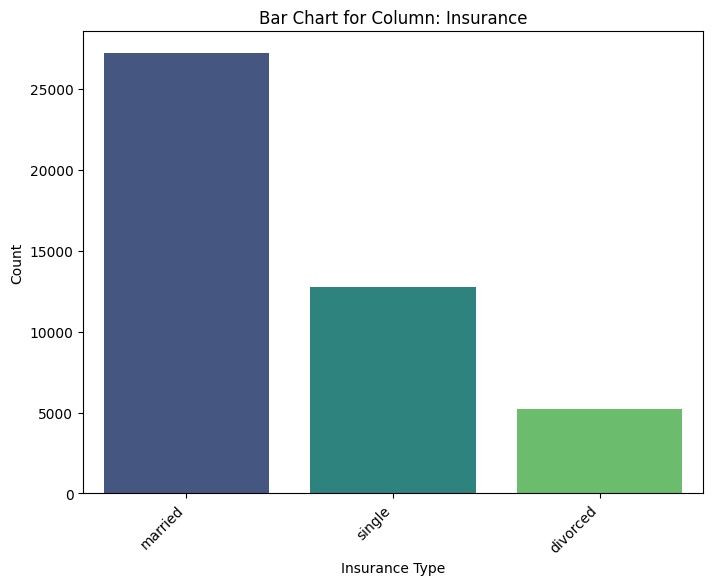

In [30]:
data = df['marital'].value_counts()

# Plot a bar chart
plt.figure(figsize=(8, 6))
sns.barplot(x=data.index, y=data, palette='viridis')
plt.title('Bar Chart for Column: Insurance')
plt.xlabel('Insurance Type')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better visibility
plt.show()

#### 9. Education

In [31]:
df["education"].value_counts()

education
secondary    23181
tertiary     13295
primary       6845
unknown       1856
Primary          3
ter tiary        2
Name: count, dtype: int64

In [32]:
df['education'] = df['education'].str.lower().str.strip().replace({'pri mary': 'primary','ter tiary': 'tertiary'})

/tmp/ipykernel_19/1477354393.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['education'] = df['education'].str.lower().str.strip().replace({'pri mary': 'primary','ter tiary': 'tertiary'})


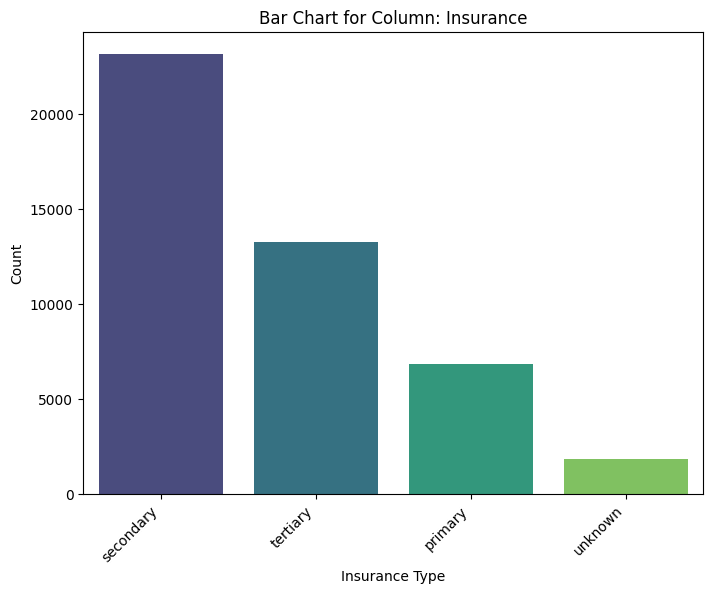

In [33]:
data = df['education'].value_counts()

# Plot a bar chart
plt.figure(figsize=(8, 6))
sns.barplot(x=data.index, y=data, palette='viridis')
plt.title('Bar Chart for Column: Insurance')
plt.xlabel('Insurance Type')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better visibility
plt.show()

#### 10. Gender

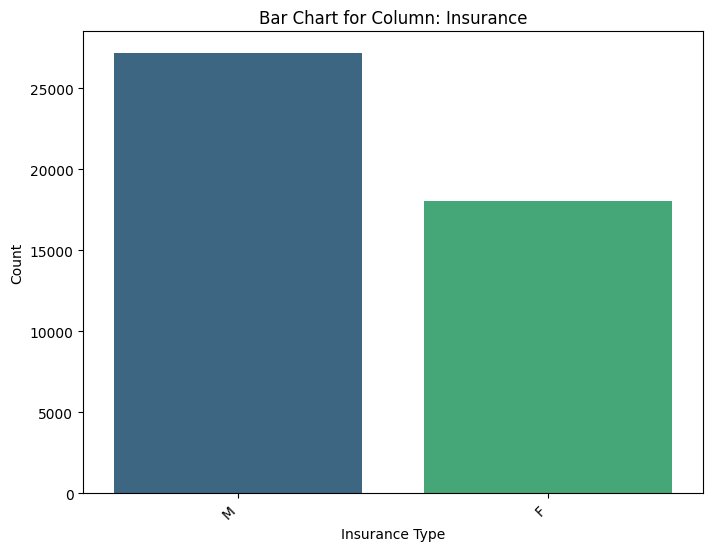

In [34]:
data = df['Gender'].value_counts()

# Plot a bar chart
plt.figure(figsize=(8, 6))
sns.barplot(x=data.index, y=data, palette='viridis')
plt.title('Bar Chart for Column: Insurance')
plt.xlabel('Insurance Type')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better visibility
plt.show()

### Univariate Numerical analysis

#### 1. Balance

In [35]:
df['balance'] = pd.to_numeric(df['balance'], errors='coerce').fillna(0).astype(int)

/tmp/ipykernel_19/394459084.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['balance'] = pd.to_numeric(df['balance'], errors='coerce').fillna(0).astype(int)


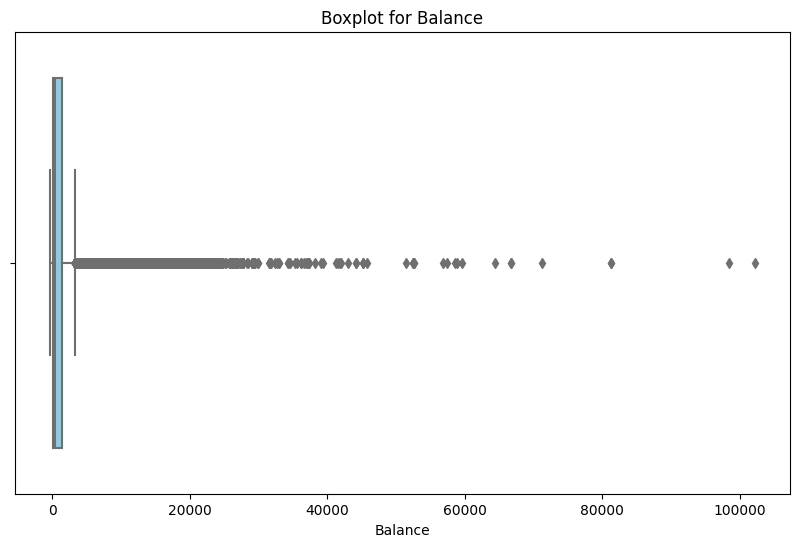

In [36]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='balance', data=df, color='skyblue')
plt.title('Boxplot for Balance')
plt.xlabel('Balance')
plt.show()

In [37]:
negative_balance_rows = df[df['balance'] < 0]
negative_balance_rows

Insurance  balance housing loan   contact  duration  campaign  \
44469        no      -32      no  yes  cellular     366.0         2   
44541        no      -62      no   no   unknown      17.0         1   
44566        no      -52      no   no   unknown      12.0         1   
44578        no     -280      no   no   unknown       6.0         1   
44626        no     -205      no   no  cellular     481.0         1   

       last_contact_day  previous poutcome Term Deposit  Count_Txn  age  \
44469               178         9  success          yes      366.0   35   
44541                 1         0  unknown           no      147.0   28   
44566                 1         0  unknown           no      382.0   34   
44578                 1         0  unknown           no      100.0   36   
44626               579         1  failure          yes      353.0   31   

                job  marital  education Annual Income Gender  
44469        admin.   single  secondary        212193      F  
44541    management   single   tertiary        211055      M  
44566      services  married  secondary        210478      M  
44578  entrepreneur  married  secondary        210026      M  
44626      services   single  secondary        208226      F

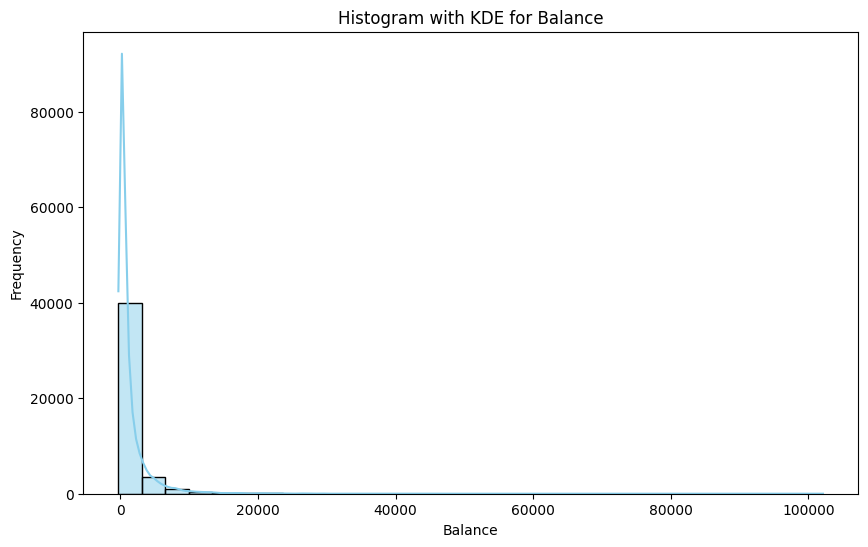

In [38]:
plt.figure(figsize=(10, 6))
sns.histplot(df['balance'], kde=True, color='skyblue', bins=30)
plt.title('Histogram with KDE for Balance')
plt.xlabel('Balance')
plt.ylabel('Frequency')
plt.show()

In [39]:
# Fill NaN values with 0 in the 'balance' column
df['balance'].fillna(0, inplace=True)

# Replace entire rows with 0 where 'balance' column contains '/' or '?'
df.loc[df['balance'].astype(str).str.contains(r'/|\?'), :] = 0

# Convert 'balance' column to integer
df['balance'] = pd.to_numeric(df['balance'], errors='coerce').fillna(0).astype(int)

# Filter rows where 'balance' is equal to 0 or less than 0 and count the values
zero_balance_rows = df[(df['balance'] == 0) | (df['balance'] < 0)]['balance'].count()
print(zero_balance_rows)

3600


/tmp/ipykernel_19/1377086841.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['balance'].fillna(0, inplace=True)
/tmp/ipykernel_19/1377086841.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['balance'] = pd.to_numeric(df['balance'], errors='coerce').fillna(0).astype(int)


We can see that 3600 accounts of 45211 has a balance of 0 and less than 0 in their accounts

In [40]:
df["balance"].describe()

count     45203.000000
mean       1414.666925
std        3020.905450
min        -280.000000
25%         136.000000
50%         484.000000
75%        1435.000000
max      102127.000000
Name: balance, dtype: float64

In [41]:
df['balance'].isnull().sum()

0

#### 2. Duration

In [42]:
df["duration"].describe()

count    45164.000000
mean       258.141418
std        257.635351
min       -167.000000
25%        103.000000
50%        180.000000
75%        319.000000
max       4918.000000
Name: duration, dtype: float64

We can see that the duration contains negative values. The duration represents the call duration between agent and customer. It cant be 0. It must be a error. The - must be added by mistake so lets remove it.

In [43]:
df['duration'] = df['duration'].abs()

/tmp/ipykernel_19/3718023910.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['duration'] = df['duration'].abs()


In [44]:
df["duration"] = df['duration'].fillna(0)

/tmp/ipykernel_19/3249404941.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["duration"] = df['duration'].fillna(0)


#### Campaign

In [45]:
df['campaign'].describe()

count    45203.000000
mean         2.762073
std          3.087224
min          0.000000
25%          1.000000
50%          2.000000
75%          3.000000
max         63.000000
Name: campaign, dtype: float64

We can see that maximum phone call made to a customer is 63.

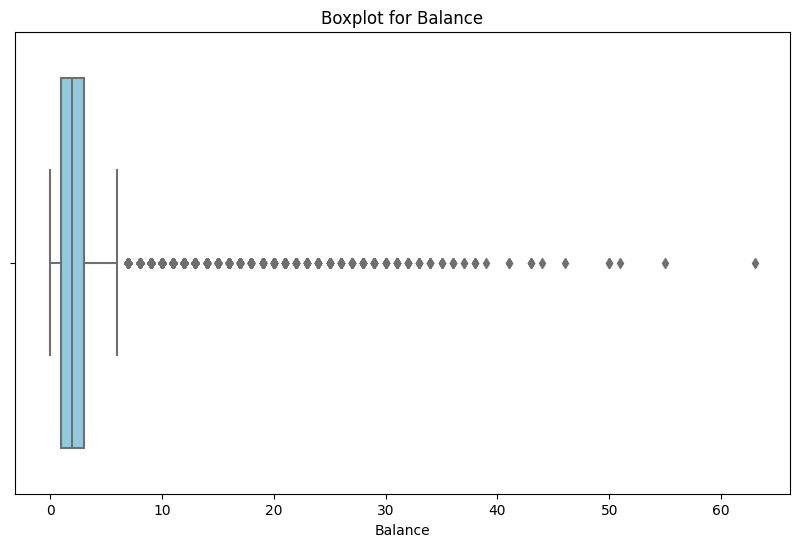

In [46]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='campaign', data=df, color='skyblue')
plt.title('Boxplot for Balance')
plt.xlabel('Balance')
plt.show()

#### Last Contact day

In [47]:
df['last_contact_day'].describe()

count    45203.000000
mean        41.839480
std         99.464347
min         -9.000000
25%          1.000000
50%          1.000000
75%          1.000000
max        871.000000
Name: last_contact_day, dtype: float64

Last contact day - Number of days that passed by after the client was last contacted from a previous campaign.
-1 implies the customer was not contacted. But we have -9 and so. Lets assume that they are errors and change to positive value other than -1.

In [48]:
df['last_contact_day'] = np.where(df['last_contact_day'] < -1, abs(df['last_contact_day']), df['last_contact_day'])

/tmp/ipykernel_19/492797166.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['last_contact_day'] = np.where(df['last_contact_day'] < -1, abs(df['last_contact_day']), df['last_contact_day'])


#### Previous - Number of contacts performed before this campaign and for this client 

In [49]:
df['previous'].describe()

count    45203.000000
mean         0.580426
std          2.303632
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max        275.000000
Name: previous, dtype: float64

In [50]:
df['previous'] = df['previous'].astype(int)

/tmp/ipykernel_19/3296379907.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['previous'] = df['previous'].astype(int)


#### Count_txn : Number of Transactions Done by the customer

In [51]:
df['Count_Txn'].describe()

count    45202.000000
mean       299.586611
std        115.711931
min       -423.000000
25%        200.000000
50%        300.000000
75%        400.000000
max        499.000000
Name: Count_Txn, dtype: float64

The count cannot be negative. So, lets assume that they are typing errors and take absolute values

In [52]:
df['Count_Txn'] = df['Count_Txn'].abs()

/tmp/ipykernel_19/1033312527.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Count_Txn'] = df['Count_Txn'].abs()


#### Age

In [53]:
df['age'].describe()

count    45203.000000
mean        40.980643
std         10.838814
min         18.000000
25%         33.000000
50%         39.000000
75%         48.000000
max        121.000000
Name: age, dtype: float64

/tmp/ipykernel_19/319287704.py:5: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.kdeplot(data=df, x='age', fill=True, palette="crest")


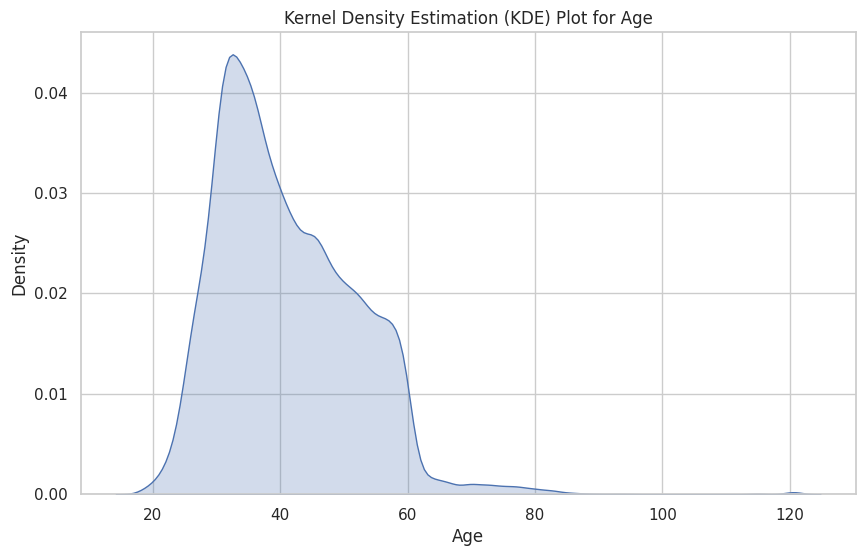

In [54]:
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))

# Create KDE plot for 'age' column
sns.kdeplot(data=df, x='age', fill=True, palette="crest")

plt.title('Kernel Density Estimation (KDE) Plot for Age')
plt.xlabel('Age')
plt.ylabel('Density')
plt.show()

In [55]:
# There seems to spike in the 120 so lets see what is the problem
top_ages = df['age'].nlargest(60)
top_ages

40789    121
40957    121
40972    121
41237    121
41242    121
41515    121
41599    121
41615    121
42197    121
42333    121
42747    121
42914    121
43142    121
43268    121
43915    121
44095    121
44932    121
45207    121
29464    120
31119    120
31919    120
33849    120
40622    120
41041    120
42025    120
42534    120
42864    120
43197    120
44396    120
44403    120
44786    120
45195    120
31723    115
32802    115
33710    115
33815    115
40383    115
40471    115
40526    115
40586    115
33699     95
41663     95
31233     94
44262     93
44420     93
41934     92
42727     92
31069     90
43194     90
41162     89
42574     89
44892     89
44669     88
44794     88
41923     87
42081     87
42494     87
42635     87
32105     86
41291     86
Name: age, dtype: int64

There seems to be logical mistake. So lets fill all those values above the 95 